# Implementation of kmodes clustering for segmentation of galactagogues (information sources).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
import plotnine
from plotnine import ggplot, geom_line, geom_point, geom_label, aes, labs, xlab, ylab, theme_minimal
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
# Use the theme of ggplot
plt.style.use('ggplot')

In [7]:
questionaire_df = pd.read_csv('/Users/soumyadeepray/Documents/Research_Project-Nutrition_Sciences/Galactagogue_buying_patterns/data/Ryan_DataforRay_MissingReplaced_2022.09.30.csv')
questionaire_df.head(10)

,ID,everbev,everherb,evermed,oats,lacttreathome,lacttreatstore,brewersyeast,coconutdrink,sportdrink,...,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,1,2,2,2,3,3,3,3,3,3,...,2,1,2,2,1,2,2,2,2,2
1,2,1,2,2,3,3,1,3,3,3,...,2,2,2,2,2,2,2,2,1,2
2,3,1,1,2,2,1,1,1,1,1,...,2,1,2,2,2,3,2,1,1,2
3,4,2,2,2,3,3,3,3,3,3,...,2,1,2,2,2,2,2,2,2,2
4,5,1,1,2,2,1,1,3,2,2,...,2,1,1,1,1,2,2,2,1,2
5,6,2,2,2,3,3,3,3,3,3,...,2,1,1,2,2,2,2,1,2,2
6,7,1,2,2,3,2,2,2,3,1,...,2,1,2,2,2,1,2,1,2,2
7,8,1,2,2,1,-99,-99,-99,-99,1,...,2,1,2,2,1,-99,2,2,1,1
8,9,2,2,2,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
9,10,2,2,2,3,3,3,3,3,3,...,2,1,2,2,2,2,2,2,2,2


In [8]:
questionaire_df=questionaire_df.replace(-99,np.nan).dropna(axis = 0, how = 'any')

In [9]:
columns = ['coparent', 'family', 'friend', 'lactationconsult', 'pediatrician',
       'obgyn', 'midwife', 'doula', 'nurse', 'wic', 'hospital', 'books',
       'facebook', 'instagram', 'twitter', 'pinterest', 'onlineforum', 'blog',
       'websites', 'searchengine', 'app']
questionaire_df = pd.DataFrame(data = questionaire_df, columns = columns)

In [10]:
questionaire_df = questionaire_df.replace({3: 2,1: 1, 2: 2}, regex = True)

Checking the column data types

In [11]:
questionaire_df.dtypes

coparent            float64
family              float64
friend              float64
lactationconsult    float64
pediatrician        float64
obgyn               float64
midwife             float64
doula               float64
nurse               float64
wic                 float64
hospital            float64
books               float64
facebook            float64
instagram             int64
twitter               int64
pinterest             int64
onlineforum         float64
blog                float64
websites            float64
searchengine        float64
app                 float64
dtype: object

Since the k-modes clustering algorithm needs categorical data, so the data type of the columns need to be changed to "category".

In [12]:
column_list = questionaire_df.columns
for col in column_list:
    questionaire_df[col] = questionaire_df[col].astype('category')

Checking the unique values of each categorical column

In [13]:
questionaire_df.select_dtypes('category').nunique()


coparent            2
family              2
friend              2
lactationconsult    2
pediatrician        2
obgyn               2
midwife             2
doula               2
nurse               2
wic                 2
hospital            2
books               2
facebook            2
instagram           2
twitter             2
pinterest           2
onlineforum         2
blog                2
websites            2
searchengine        2
app                 2
dtype: int64

In [14]:
# We keep a copy of the original data
questionaire_df_copy = questionaire_df.copy()

__Choosing the optimal number of clusters__

In [15]:
cost = []
for cluster in range(1, 21):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(questionaire_df)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19
Cluster initiation: 20


Converting the results into a dataframe and plotting them

In [16]:
df_cost = pd.DataFrame({'Cluster': range(1, 21), 'Cost': cost})

In [17]:
df_cost

,Cluster,Cost
0,1,6285.0
1,2,5135.0
2,3,4737.0
3,4,4437.0
4,5,4268.0
5,6,4058.0
6,7,4061.0
7,8,3962.0
8,9,3903.0
9,10,3826.0


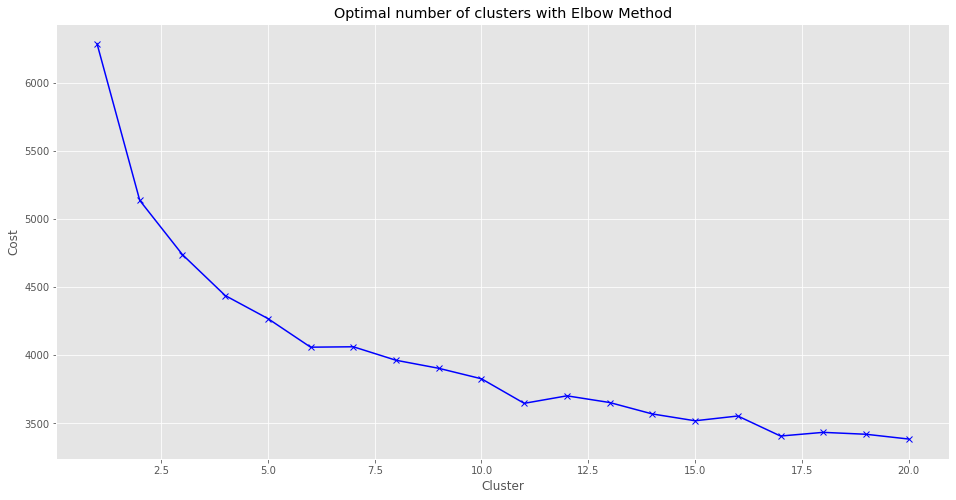

In [18]:
plt.figure(figsize=(16,8))
plt.plot(df_cost['Cluster'], df_cost['Cost'], 'bx-')
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.title('Optimal number of clusters with Elbow Method')
plt.show()

Calculating Silhouette Scores for the clusters

In [19]:
cost = []
for cluster in range(2, 21):
    try:
        kmodes = KModes(n_clusters = cluster, init = 'Huang', random_state = 0)
        fitClusters = kmodes.fit_predict(questionaire_df)
        cost.append(kmodes.cost_)
        silhouette_avg = silhouette_score(questionaire_df, fitClusters)
        print("For n_clusters =", cluster,"The average silhouette_score is :",silhouette_avg)
    except:
        break


For n_clusters = 2 The average silhouette_score is : 0.13962846785683206
For n_clusters = 3 The average silhouette_score is : 0.08902994240962081
For n_clusters = 4 The average silhouette_score is : 0.09319708778438605
For n_clusters = 5 The average silhouette_score is : 0.07528937487207134
For n_clusters = 6 The average silhouette_score is : 0.0804850692141226
For n_clusters = 7 The average silhouette_score is : 0.08146084784777051
For n_clusters = 8 The average silhouette_score is : 0.06098654575544883
For n_clusters = 9 The average silhouette_score is : 0.0772809468753239
For n_clusters = 10 The average silhouette_score is : 0.06985231115912698
For n_clusters = 11 The average silhouette_score is : 0.0673367653965163
For n_clusters = 12 The average silhouette_score is : 0.06748052469744006
For n_clusters = 13 The average silhouette_score is : 0.0706783075944691
For n_clusters = 14 The average silhouette_score is : 0.06505297470687461
For n_clusters = 15 The average silhouette_score i

According to the silhouette scores, we find that the optimal number of clusters is k=9 as the corresponding silhouette coefficient is 0.77. So, we consider choosing k=9 for the cluster analysis.

In [20]:
# Fit the cluster
kmodes = KModes(n_jobs = -1, n_clusters = 9, init = 'Huang', random_state = 0)
fitClusters = kmodes.fit_predict(questionaire_df)

In [21]:
clusterCentroidsDf = pd.DataFrame(kmodes.cluster_centroids_)
clusterCentroidsDf.columns = questionaire_df.columns
clusterCentroidsDf

,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,...,books,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app
0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
1,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
4,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
5,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
6,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0
7,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0
8,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


Combining the predicted clusters with the original dataframe

In [22]:
questionaire_df = questionaire_df_copy.reset_index()

In [23]:
clustersDf = pd.DataFrame(fitClusters)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([questionaire_df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [24]:
combinedDf.head(10)

,coparent,family,friend,lactationconsult,pediatrician,obgyn,midwife,doula,nurse,wic,...,facebook,instagram,twitter,pinterest,onlineforum,blog,websites,searchengine,app,cluster_predicted
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2,2,1,2.0,2.0,2.0,2.0,2.0,2
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2,2,2,2.0,2.0,2.0,1.0,2.0,2
2,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,...,1.0,2,2,2,2.0,2.0,1.0,1.0,2.0,1
3,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2,2,2,2.0,2.0,2.0,2.0,2.0,8
4,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,1,1,1,2.0,2.0,2.0,1.0,2.0,8
5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,1,2,2,2.0,2.0,1.0,2.0,2.0,8
6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2,2,2,1.0,2.0,1.0,2.0,2.0,0
7,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0,2
8,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,2,2,2,2.0,2.0,2.0,2.0,2.0,2
9,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2,2,2,2.0,2.0,2.0,2.0,2.0,2


Cluster identification

In [26]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
cluster_5 = combinedDf[combinedDf['cluster_predicted'] == 5]
cluster_6 = combinedDf[combinedDf['cluster_predicted'] == 6]
cluster_7 = combinedDf[combinedDf['cluster_predicted'] == 7]
cluster_8 = combinedDf[combinedDf['cluster_predicted'] == 8]

In [27]:
for i in range(0, 9):
    print("Cluster Number "+ str(i) + " and Length:- "+str(len(combinedDf[combinedDf['cluster_predicted'] == i])))

Cluster Number 0 and Length:- 284
Cluster Number 1 and Length:- 172
Cluster Number 2 and Length:- 311
Cluster Number 3 and Length:- 48
Cluster Number 4 and Length:- 91
Cluster Number 5 and Length:- 116
Cluster Number 6 and Length:- 82
Cluster Number 7 and Length:- 33
Cluster Number 8 and Length:- 70


In [28]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 2 to 1205
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   coparent           172 non-null    category
 1   family             172 non-null    category
 2   friend             172 non-null    category
 3   lactationconsult   172 non-null    category
 4   pediatrician       172 non-null    category
 5   obgyn              172 non-null    category
 6   midwife            172 non-null    category
 7   doula              172 non-null    category
 8   nurse              172 non-null    category
 9   wic                172 non-null    category
 10  hospital           172 non-null    category
 11  books              172 non-null    category
 12  facebook           172 non-null    category
 13  instagram          172 non-null    category
 14  twitter            172 non-null    category
 15  pinterest          172 non-null    category
 16  onlinef

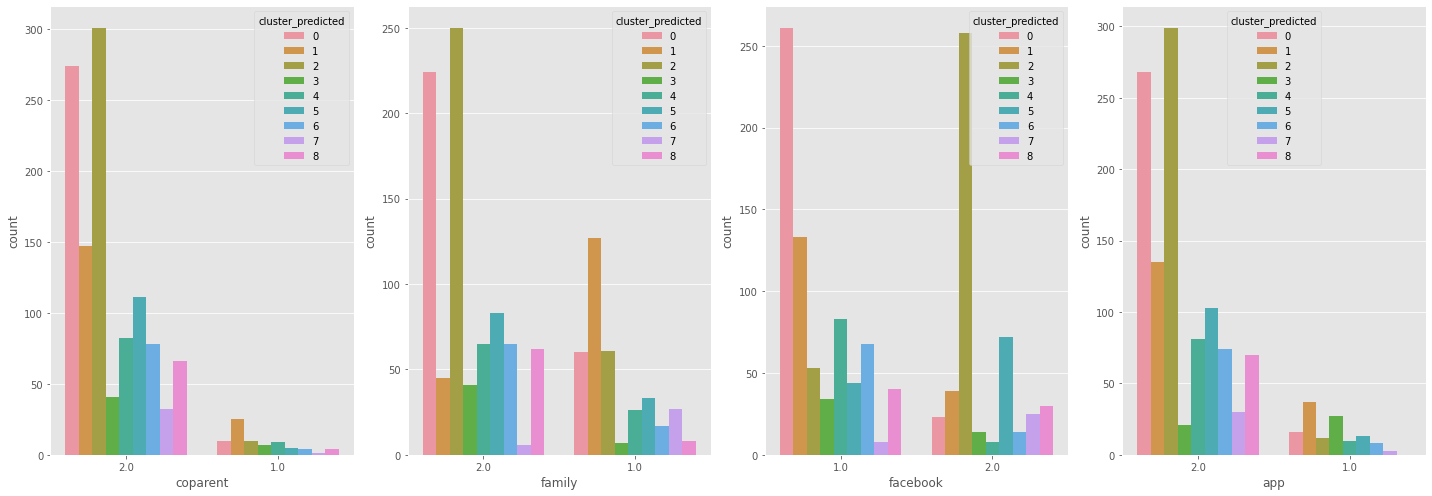

In [29]:
f, axs = plt.subplots(1,4,figsize = (20,7))
sns.countplot(x=combinedDf['coparent'],order=combinedDf['coparent'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['family'],order=combinedDf['family'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['facebook'],order=combinedDf['facebook'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])
sns.countplot(x=combinedDf['app'],order=combinedDf['app'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[3])
plt.tight_layout()
plt.show()

__Creating dataframes of clusters having the galactagogues and their count of occurrences inside the cluster__

In [59]:
for i in range(0,10):
    globals()[f"cluster_{i}"] = combinedDf[combinedDf['cluster_predicted'] == i]
    globals()[f"cluster{i}"] = globals()[f"cluster_{i}"].isin([1]).sum(axis=0)
    globals()[f"cluster{i}"] = pd.DataFrame(globals()[f"cluster{i}"])
    globals()[f"cluster{i}"]['galactagogue'] = globals()[f"cluster{i}"].index
    globals()[f"cluster{i}"] = globals()[f"cluster{i}"].rename(columns ={0:'count'})
    globals()[f"cluster{i}"].reset_index(drop=True, inplace=True)
    globals()[f"cluster{i}"] = globals()[f"cluster{i}"].sort_values('count', ascending=False)
    globals()[f"cluster{i}"] = globals()[f"cluster{i}"].loc[globals()[f"cluster{i}"]["galactagogue"] != "cluster_predicted"]


__Visualizing the contents of various clusters__

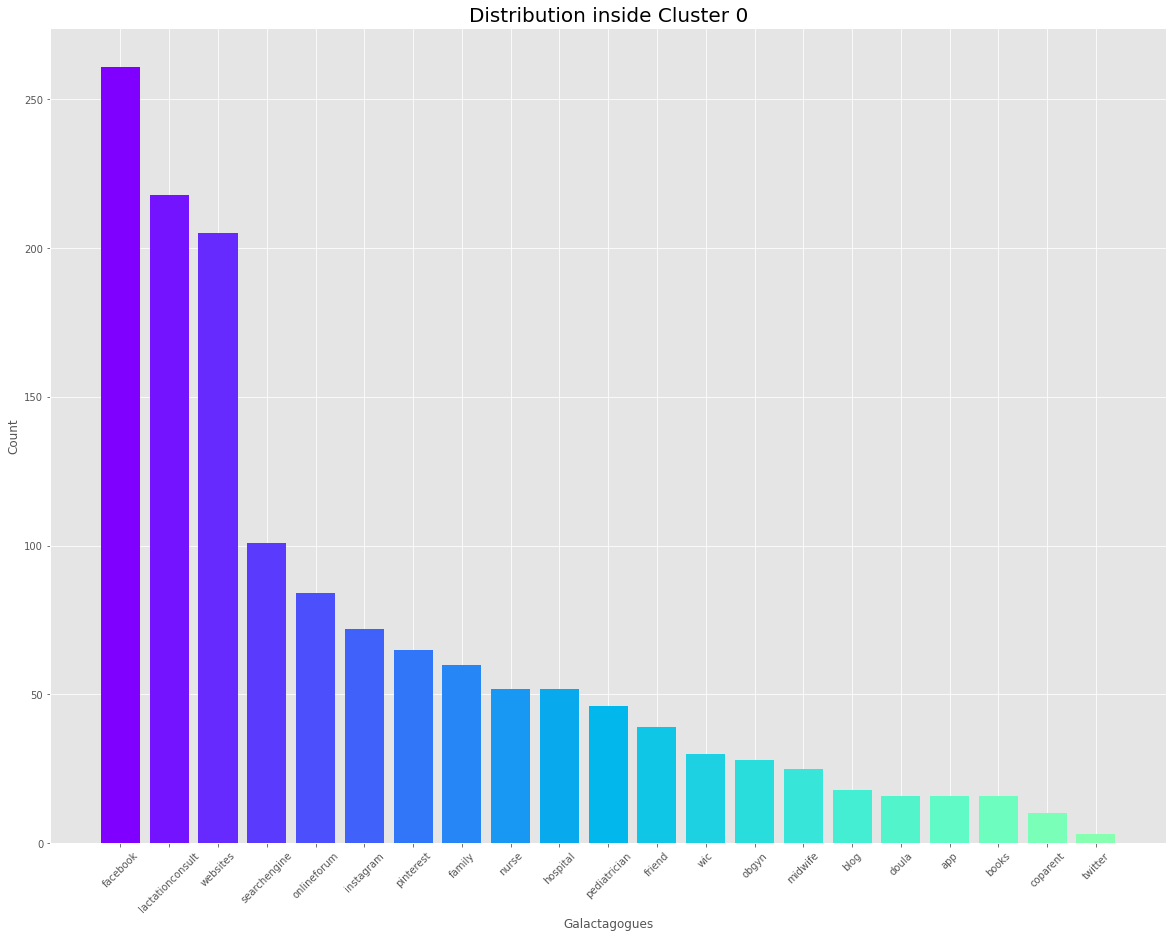

In [60]:
plt.rcParams['figure.figsize']=(20,15)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.bar(cluster0['galactagogue'], cluster0['count'], color = color,data=cluster0)
plt.xticks(rotation = 45 )
plt.xlabel('Galactagogues')
plt.ylabel('Count')
plt.title('Distribution inside Cluster 0', fontsize = 20)
plt.show()

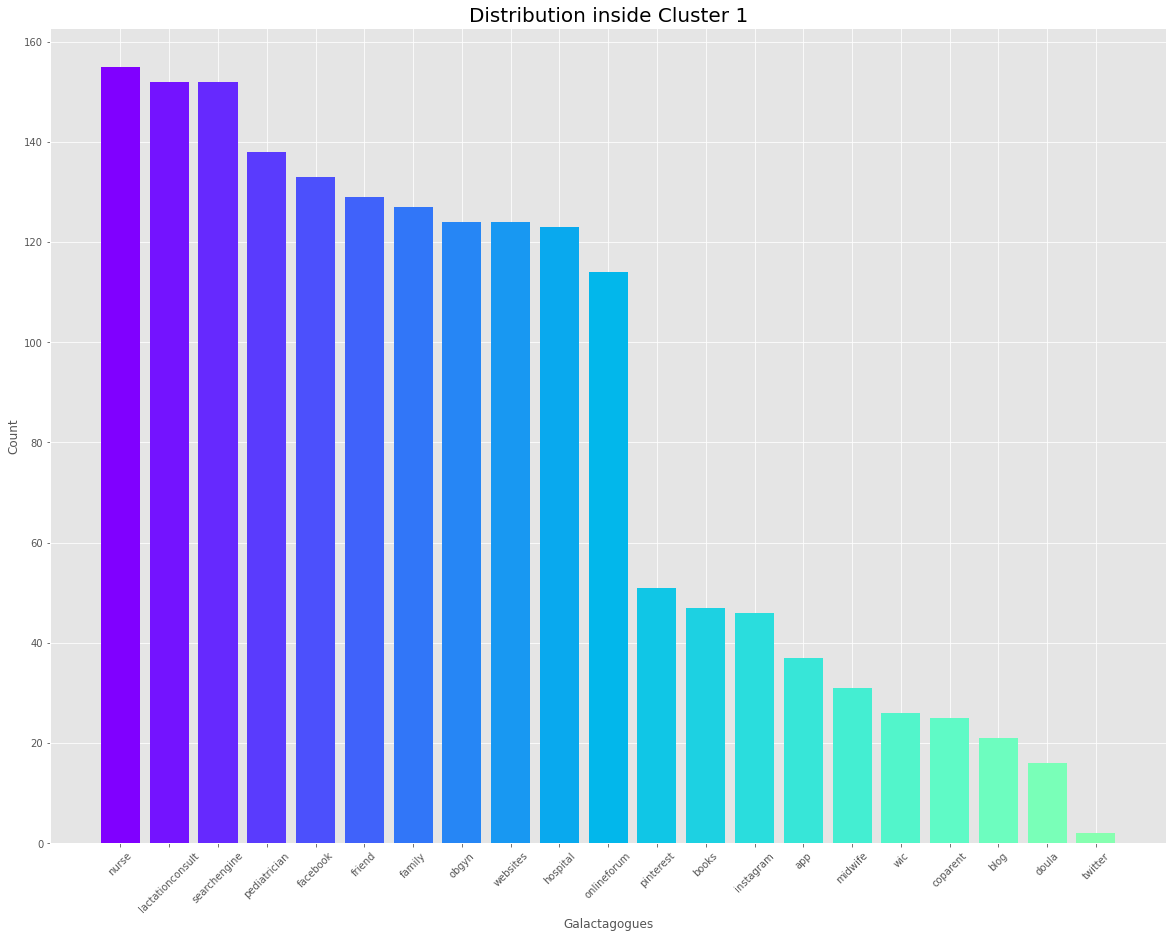

In [61]:
plt.rcParams['figure.figsize']=(20,15)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.bar(cluster1['galactagogue'], cluster1['count'], color = color,data=cluster1)
plt.xticks(rotation = 45 )
plt.xlabel('Galactagogues')
plt.ylabel('Count')
plt.title('Distribution inside Cluster 1', fontsize = 20)
plt.show()

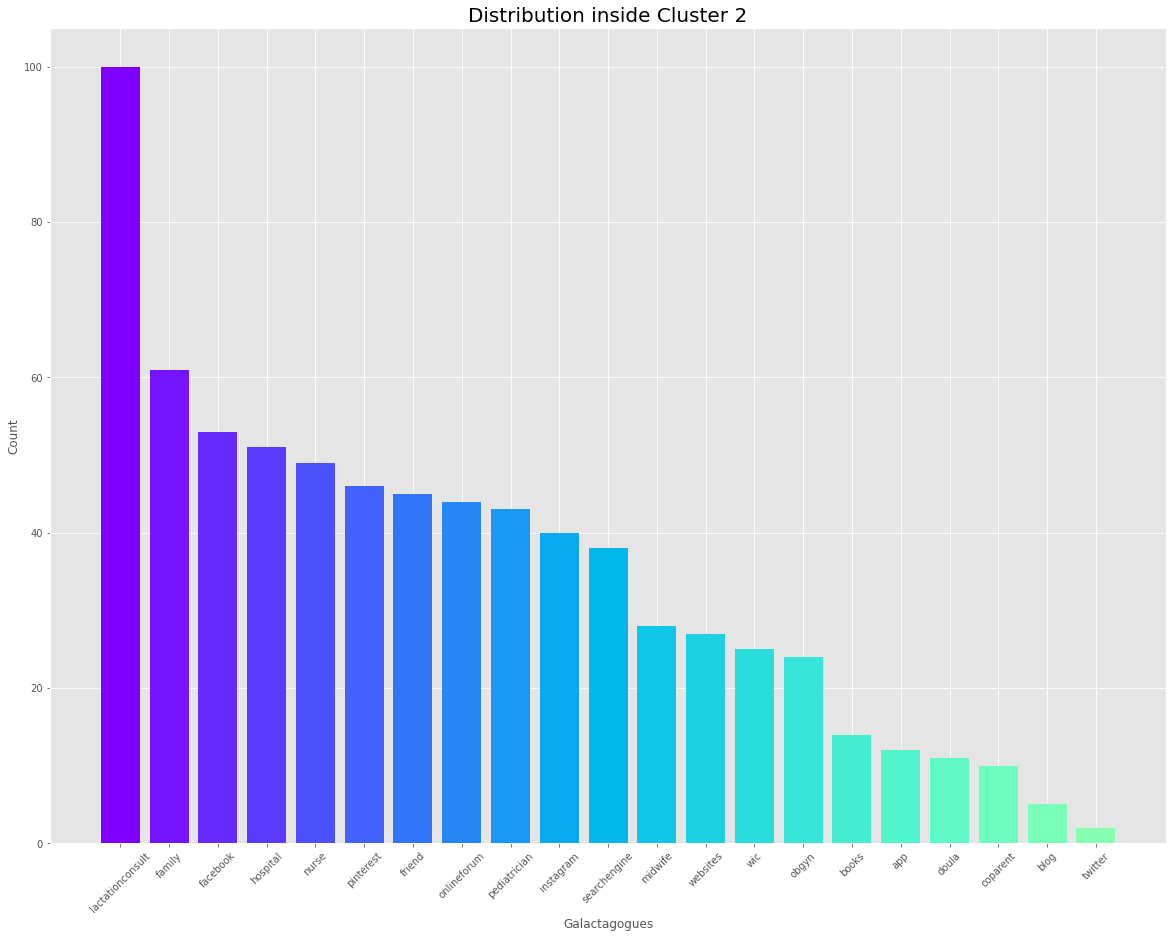

In [62]:
plt.rcParams['figure.figsize']=(20,15)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.bar(cluster2['galactagogue'], cluster2['count'], color = color,data=cluster2)
plt.xticks(rotation = 45 )
plt.xlabel('Galactagogues')
plt.ylabel('Count')
plt.title('Distribution inside Cluster 2', fontsize = 20)
plt.show()

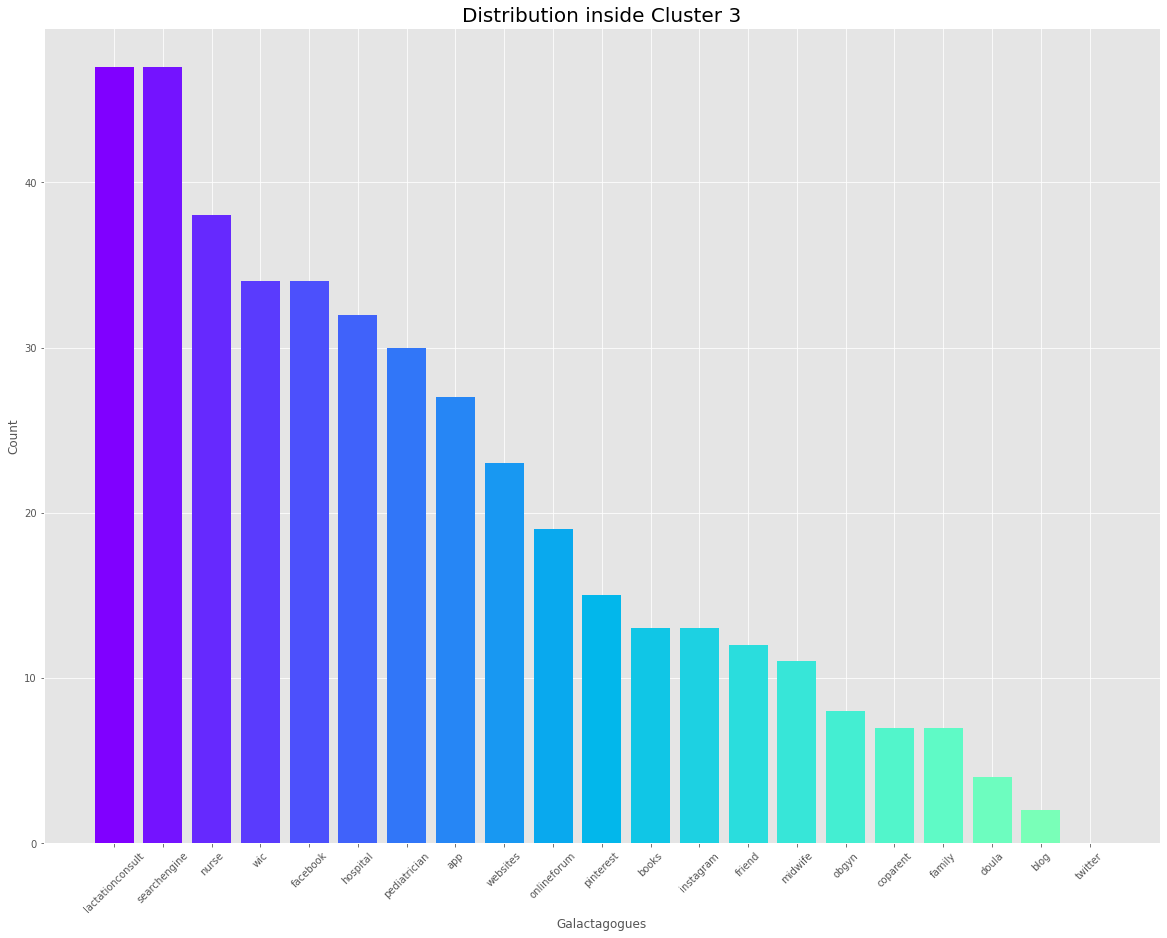

In [63]:
plt.rcParams['figure.figsize']=(20,15)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.bar(cluster3['galactagogue'], cluster3['count'], color = color,data=cluster3)
plt.xticks(rotation = 45 )
plt.xlabel('Galactagogues')
plt.ylabel('Count')
plt.title('Distribution inside Cluster 3', fontsize = 20)
plt.show()

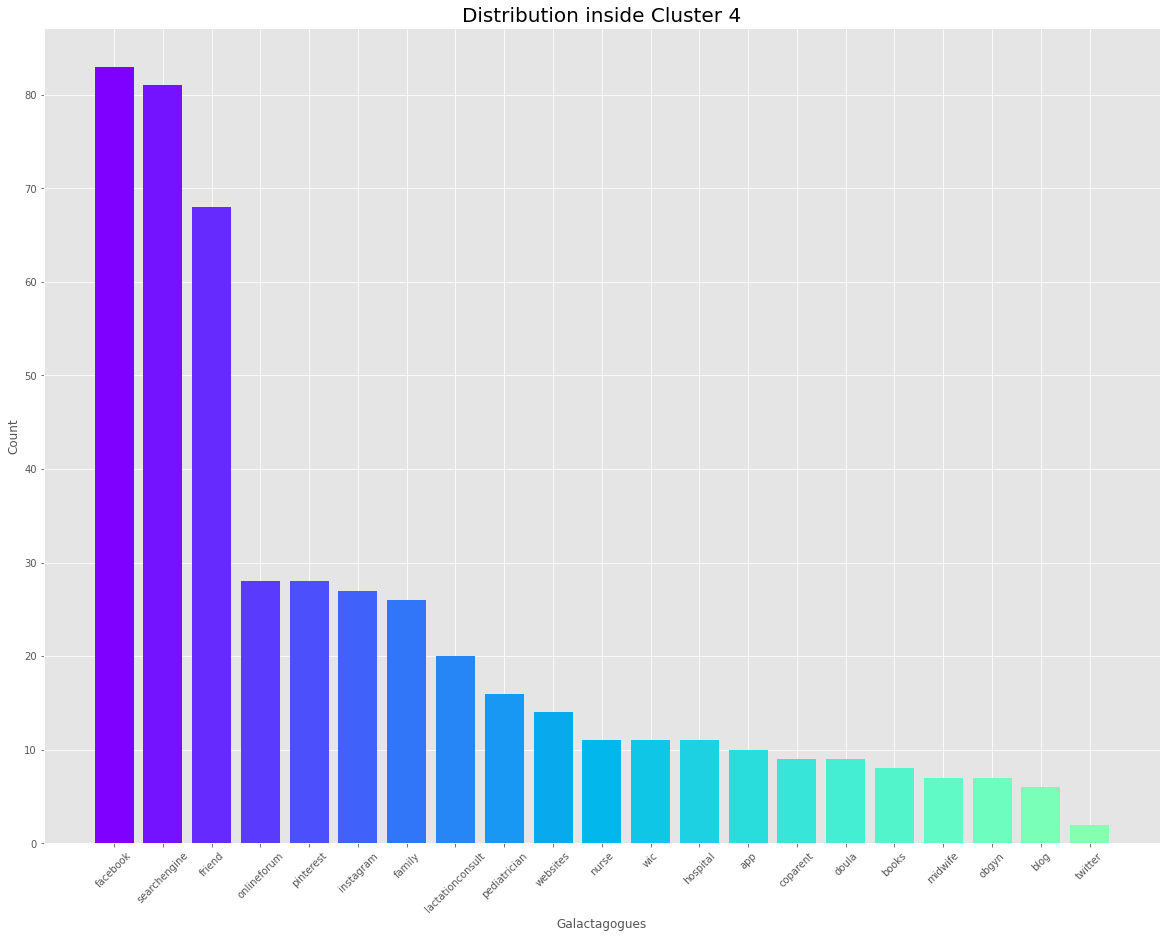

In [64]:
plt.rcParams['figure.figsize']=(20,15)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.bar(cluster4['galactagogue'], cluster4['count'], color = color,data=cluster4)
plt.xticks(rotation = 45 )
plt.xlabel('Galactagogues')
plt.ylabel('Count')
plt.title('Distribution inside Cluster 4', fontsize = 20)
plt.show()

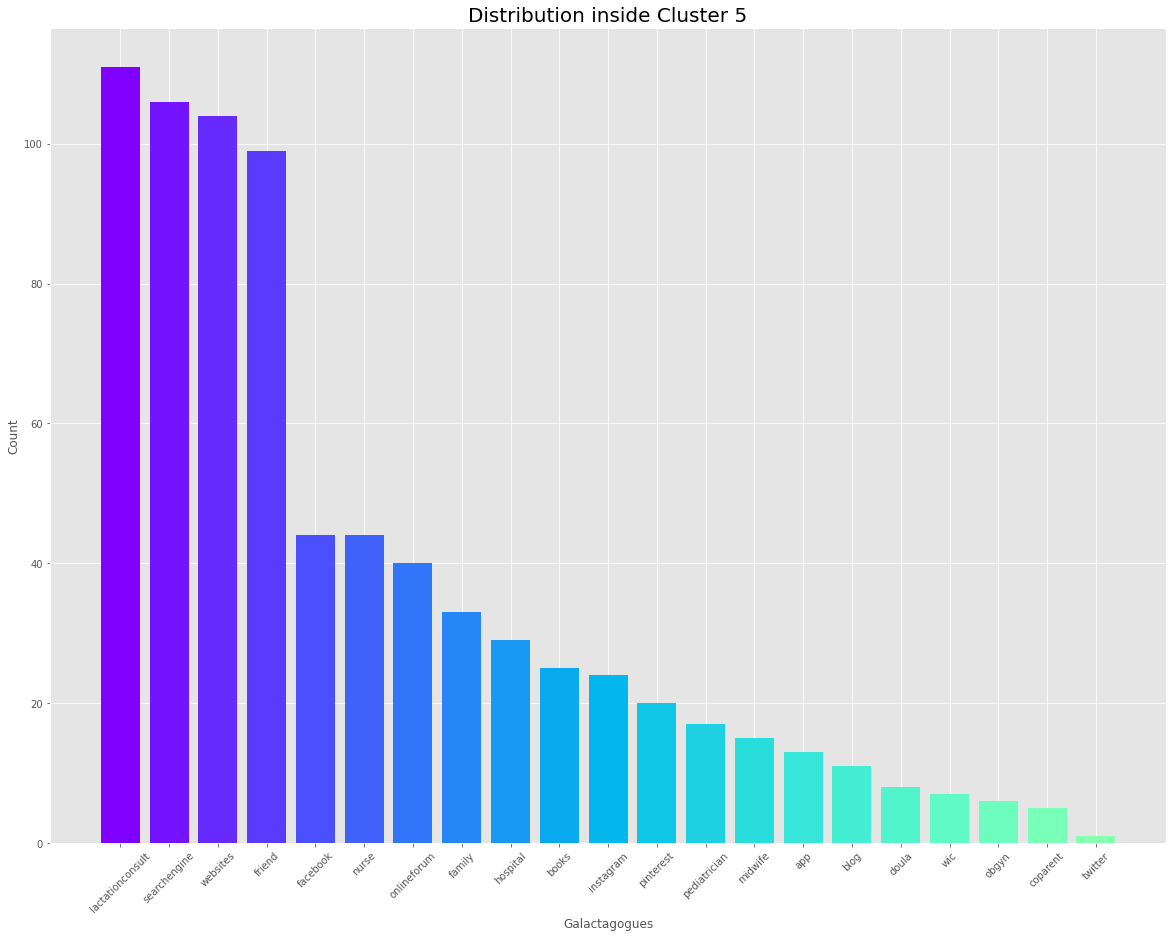

In [65]:
plt.rcParams['figure.figsize']=(20,15)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.bar(cluster5['galactagogue'], cluster5['count'], color = color,data=cluster5)
plt.xticks(rotation = 45 )
plt.xlabel('Galactagogues')
plt.ylabel('Count')
plt.title('Distribution inside Cluster 5', fontsize = 20)
plt.show()

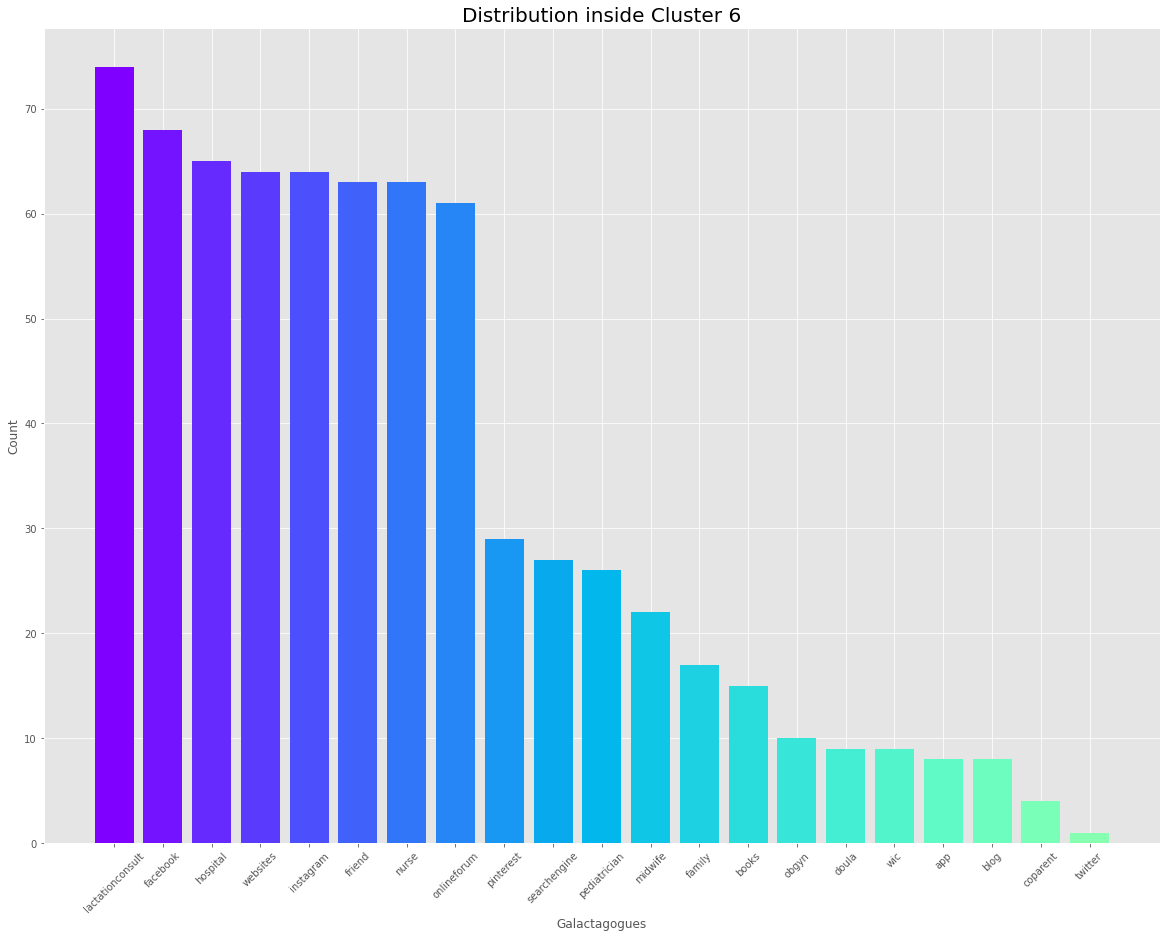

In [66]:
plt.rcParams['figure.figsize']=(20,15)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.bar(cluster6['galactagogue'], cluster6['count'], color = color,data=cluster6)
plt.xticks(rotation = 45 )
plt.xlabel('Galactagogues')
plt.ylabel('Count')
plt.title('Distribution inside Cluster 6', fontsize = 20)
plt.show()

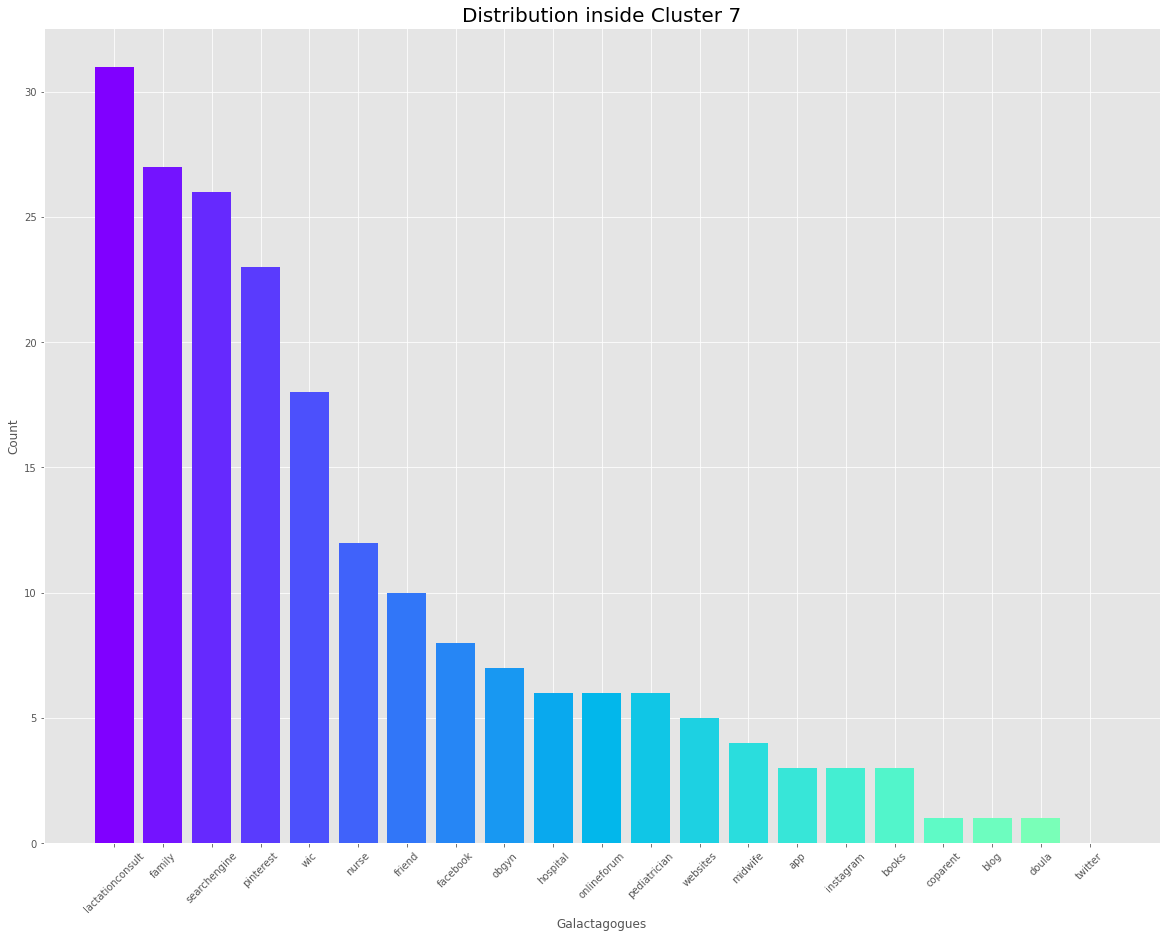

In [67]:
plt.rcParams['figure.figsize']=(20,15)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.bar(cluster7['galactagogue'], cluster7['count'], color = color,data=cluster7)
plt.xticks(rotation = 45 )
plt.xlabel('Galactagogues')
plt.ylabel('Count')
plt.title('Distribution inside Cluster 7', fontsize = 20)
plt.show()

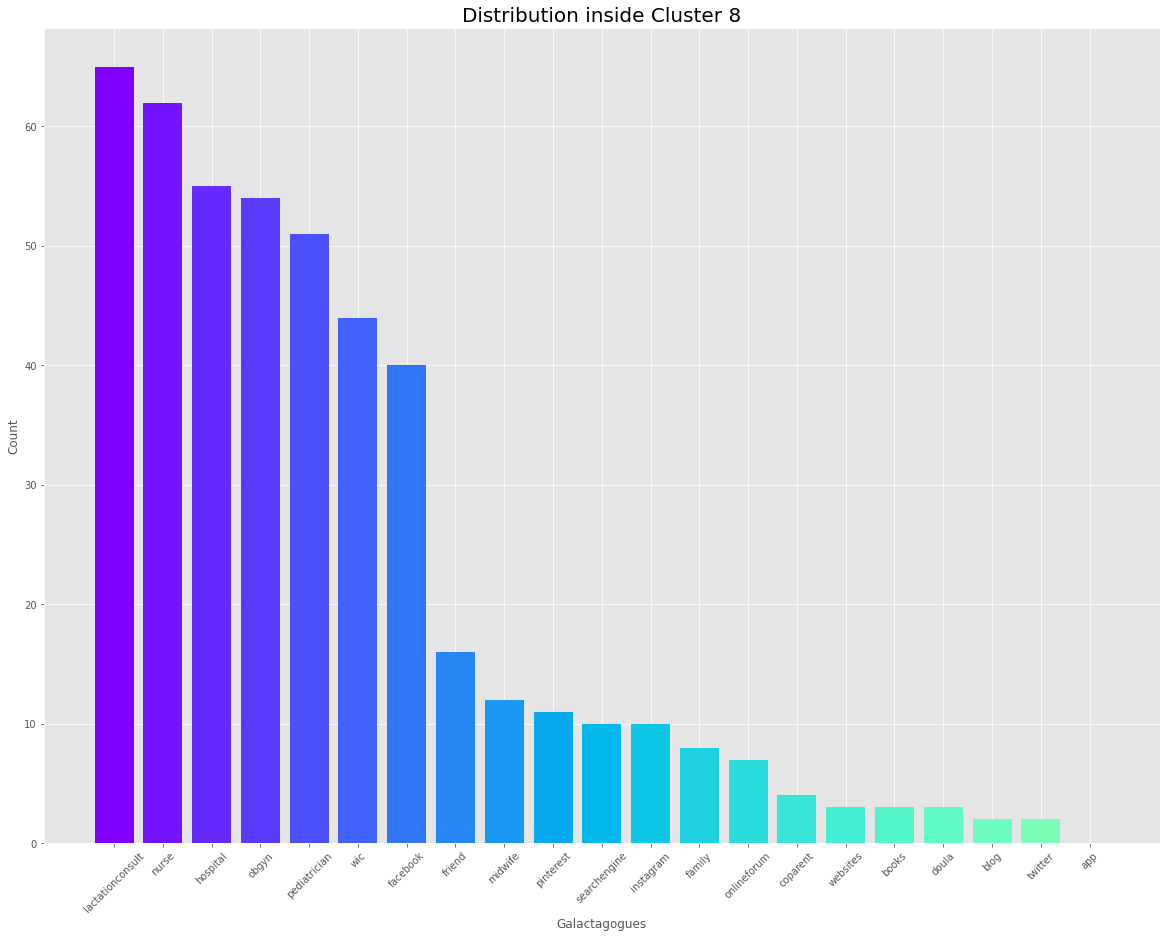

In [68]:
plt.rcParams['figure.figsize']=(20,15)
color = plt.cm.rainbow(np.linspace(0, 1, 40))
plt.bar(cluster8['galactagogue'], cluster8['count'], color = color,data=cluster8)
plt.xticks(rotation = 45 )
plt.xlabel('Galactagogues')
plt.ylabel('Count')
plt.title('Distribution inside Cluster 8', fontsize = 20)
plt.show()